In [64]:
# biblioteke
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [65]:
# učitavanje skupa podataka iz biblioteke sklearn
data = datasets.load_breast_cancer()
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [66]:
# pretvaranje podataka iz tipa array u tip dataframe iz biblioteke pandas
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# ispis prvih par redaka
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [67]:
# provjera ima li dataset NaN vrijednosti kako bismo takve retke obrisali ili ih popunili smislenim vrijednostima
missing_values = X.isnull().sum()
print(missing_values)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [68]:
# dijeljenje skupa podataka u train i test dio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Standardizacija podataka u strojnom učenju je važna jer omogućuje da svi atributi imaju isti raspon vrijednosti, što značajno poboljšava učinkovitost mnogih algoritama. Ovo pogotovo vrijedi za algoritme koji se temelje na računanju udaljenosti (kao što je u našem slučaju k-NN algoritam). Ako atributi nisu na istoj skali, oni s većim rasponom vrijednosti mogu dominirati prilikom izračuna udaljenosti, što može dovesti do loših rezultata. S druge strane, standardizacija nebi trebala imati efekt na algoritam Naivnog Bayesa. Kako bismo provjerili učinak standardizacije podataka, testirat ćemo oba algoritma na originalnim podacima i standardiziranim podacima.

In [69]:
# standardizacija skupa podataka 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # skaliranje X_train
X_test_scaled = scaler.transform(X_test) # skaliranje X_test na temelju aritmetičke sredine i standardne devijacije dobivene iz skupa X_train (zato ne koristimo fit_transform naredbu već samo transform)

# KNN algoritam

### Originalni podaci

Koristit ćemo klasifikator k-najbližih susjeda gdje ćemo ručno postaviti broj susjeda na 3, a parametar weights na 'distance' što znači da je težina točke obrnuto proporcionalna udaljenosti od točke čiju klasu želimo predvidjeti

In [70]:
# treniranje knn modela
model_knn = KNeighborsClassifier(n_neighbors=3, weights='distance') 
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

Prilikom ispisa rezultata predikcija, ispisujemo mjere; točnost, osjetljivost i matricu pogrešaka. Kod klasifikacije raka dojke, mjera osjetljivosti (udio ispravno predviđenih pozitivnih slučajeva među svim stvarnim pozitivnim slučajevima) je posebno važna jer nam je prioritet smanjiti broj propuštenih pozitivnih slučajeva (lažno negativnih), tj. pacijentica s rakom koje nisu pravilno prepoznate. Upravo ćemo se zato, kod odabira najboljeg modela, koncentrirati na model s najvišom mjerom osjetljivosti. Matrica pogrešaka daje nam pregled ispravnih i pogrešnih predikcija, što je korisno za detaljniju analizu. Matrica pogrešaka iz sklearn bibilioteke izgleda ovako:  TN FP
                                                                  FN TP

In [71]:
# testiranje knn modela
y_pred_knn = model_knn.predict(X_test)

# ispis različitih metrika
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("Confusion matrix:\n", conf_matrix_knn)

Accuracy: 0.9239766081871345
Recall: 0.9444444444444444
Confusion matrix:
 [[ 56   7]
 [  6 102]]


### Skalirani podaci

In [72]:
# treniranje modela na skaliranim podacima
model_knn_scaled = KNeighborsClassifier(n_neighbors=3, weights='distance')
model_knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [73]:
# testiranje knn modela na skaliranim podacima
y_pred_knn_scaled = model_knn_scaled.predict(X_test_scaled)
accuracy_knn_scaled = accuracy_score(y_test, y_pred_knn_scaled)
recall_knn_scaled = recall_score(y_test, y_pred_knn_scaled)
conf_matrix_knn_scaled = confusion_matrix(y_test, y_pred_knn_scaled)

print("Accuracy:", accuracy_knn_scaled)
print("Recall:", recall_knn_scaled)
print("Confusion matrix:\n", conf_matrix_knn_scaled)

Accuracy: 0.935672514619883
Recall: 0.9722222222222222
Confusion matrix:
 [[ 55   8]
 [  3 105]]


### Grid search - model s najboljim parametrima

Kako bismo pronašli parametre s kojima model daje najbolje predikcije, koristimo se grid search algoritmom. To je algoritam koji pretražuje sve moguće kombinacije unaprijed definiranih hiperparametara kako bi pronašao najbolje vrijednosti za određeni model strojnog učenja. Cilj je optimizirati performanse modela odabirom kombinacije hiperparametara koja daje najbolji rezultat prema odabranoj metričkoj funkciji, u našem slučaju osjetljivosti.

In [74]:
# grid search algoritam za dobivanje najboljih parametra - broj susjeda i metrika
knn = KNeighborsClassifier(weights='distance')

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15], # biramo između 6 vrijednosti broja susjeda 
    'metric': ['euclidean', 'manhattan', 'minkowski']  # biramo između 3 metrike
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1) # odabrat ćemo parametre s kojima dobivamo najviši recall
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation Recall:", grid_search.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9}
Best cross-validation Recall: 0.992


Grid search algoritam kaže da je optimalan broj susjeda 9, a metrika koji bismo trebali koristiti euklidska kako bismo dobili bolje rezutate. Euklidska metrika je već postavljena pri pozivu kNN klasifikatora, tako da je potrebno izmjeniti samo broj susjeda.

In [75]:
# treniranje optimiziranog knn modela na skaliranim podacima
best_model_knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='euclidean')
best_model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

In [76]:
# testiranje optimiziranog knn modela na skaliranim podacima
y_pred_knn_optimized = best_model_knn.predict(X_test_scaled)

# ispis rezultata
accuracy_knn_optimized = accuracy_score(y_test, y_pred_knn_optimized)
recall_knn_optimized = recall_score(y_test, y_pred_knn_optimized)
conf_matrix_knn_optimized = confusion_matrix(y_test, y_pred_knn_optimized)

print("Accuracy:", accuracy_knn_optimized)
print("Recall:", recall_knn_optimized)
print("Confusion matrix:\n", conf_matrix_knn_optimized)

Accuracy: 0.9649122807017544
Recall: 0.9907407407407407
Confusion matrix:
 [[ 58   5]
 [  1 107]]


Prema svim metrikama, standardizacija podataka donosi značajno poboljšanje. Osjetljivost je porasla s 0.94 na 0.97, a iz matrice pogrešaka vidi se da je broj lažno negativnih slučajeva prepolovljen (sa 6 na 3), što je veliki napredak. Optimizacija modela pomoću grid search algoritma dodatno poboljšava rezultate – osjetljivost skače na 0.99, a ostaje samo jedan lažno negativan slučaj.

## Naive Bayes algoritam

### Originalni podaci

In [77]:
# treniranje modela na originalnim podacima
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [78]:
# testiranje nb modela
y_pred_nb = model_nb.predict(X_test)

# ispis rezultata
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

print("Accuracy:", accuracy_nb)
print("Recall:", recall_nb)
print("Confusion matrix:\n", conf_matrix_nb)

Accuracy: 0.9239766081871345
Recall: 0.9351851851851852
Confusion matrix:
 [[ 57   6]
 [  7 101]]


### Skalirani podaci

In [79]:
# treniranje modela nb na skaliranim podacima
model_nb_scaled = GaussianNB()
model_nb_scaled.fit(X_train_scaled, y_train)

GaussianNB()

In [80]:
# testiranje nb modela na skaliranim podacima
y_pred_nb_scaled = model_nb_scaled.predict(X_test_scaled)

# ispis rezultata
accuracy_nb_scaled = accuracy_score(y_test, y_pred_nb_scaled)
conf_matrix_nb_scaled = confusion_matrix(y_test, y_pred_nb_scaled)
recall_nb_scaled = recall_score(y_test, y_pred_nb_scaled)

print("Accuracy:", accuracy_nb_scaled)
print("Recall:", recall_nb_scaled)
print("Confusion matrix:\n", conf_matrix_nb_scaled)

Accuracy: 0.9122807017543859
Recall: 0.9166666666666666
Confusion matrix:
 [[57  6]
 [ 9 99]]


### Grid Search - model s najboljim parametrima

In [81]:
gnb = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Variance smoothing parameter
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, 
                           scoring='recall', n_jobs=-1, return_train_score=True)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'var_smoothing': 1e-09}
Best Recall Score: 0.9639183673469388


Kako je parametar varijance 1e-09 već postavljen pri pozivu Naive Bayes klasifikatora u sklearn bibilioteci, nećemo ponavljati testiranje.

### Pokušaj optimizacije modela izbacivanjem zavisnih stupaca

Pokušajmo još jednom poboljšati rezultate modela. Identificirat ćemo zavisne značajke, što je važno za Naive Bayes algoritam jer se pretpostavlja da su značajke neovisne jedna o drugoj. Uklanjanjem značajki koje su visoko korelirale, moguće je poboljšanje točnosti modela. Kako bismo identificirali zavisne značajke koristimo se vizualnim prikazom (heatmap-om). Svaka ćelija u heatmapu prikazuje koeficijent korelacije, koji varira od -1 do 1: vrijednosti bliže 1 označavaju jaku pozitivnu korelaciju, vrijednosti bliže -1 označavaju jaku negativnu korelaciju, dok vrijednosti oko 0 označavaju slabu korelaciju.

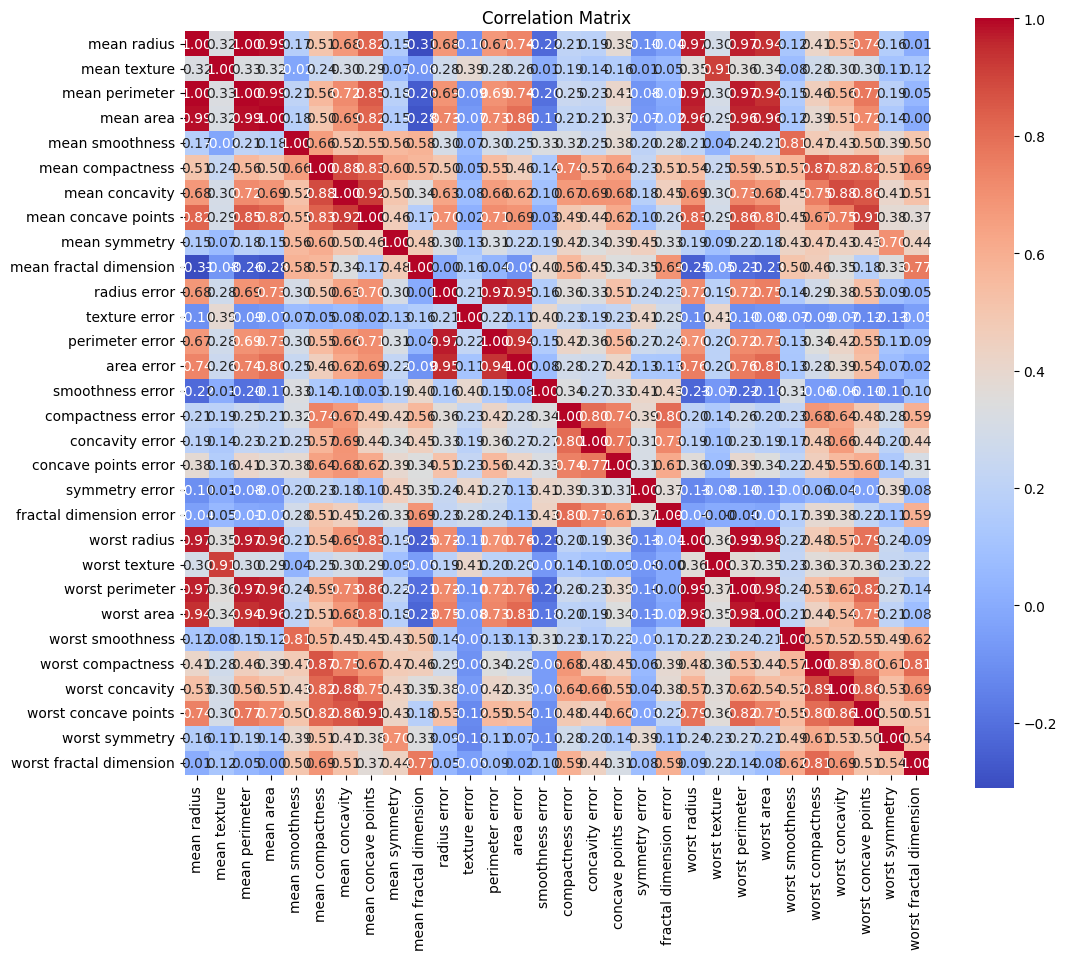

In [82]:
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

Kao što smo mogli pretpostaviti, značajke 'mean perimeter' i 'mean area' imaju snažnu pozitivnu korelaciju sa značajkom 'mean radius'. Također, značajke 'worst perimeter' i 'worst area' imaju snažnu korelaciju sa značajkom 'worst radius'. Izbacit ćemo dakle navedene 4 značajke i testirati model na novim podacima.

In [83]:
# izbacivanje zavisnih stupaca iz skupa podataka
X_independent = X.drop(columns=['mean perimeter', 'mean area', 'worst perimeter', 'worst area'])
X_independent_train, X_independent_test, y_train, y_test = train_test_split(X_independent, y, test_size=0.3, random_state=0)

In [84]:
model_nb_scaled.fit(X_independent_train, y_train)

# testiranje nb modela na podacima
y_pred_nb_independent_scaled = model_nb_scaled.predict(X_independent_test)

# ispis rezultata
accuracy_nb_scaled = accuracy_score(y_test, y_pred_nb_independent_scaled)
conf_matrix_nb_scaled = confusion_matrix(y_test, y_pred_nb_independent_scaled)
recall_nb_scaled = recall_score(y_test, y_pred_nb_independent_scaled)

print("Accuracy:", accuracy_nb_scaled)
print("Recall:", recall_nb_scaled)
print("Confusion matrix:\n", conf_matrix_nb_scaled)

Accuracy: 0.8888888888888888
Recall: 0.9074074074074074
Confusion matrix:
 [[54  9]
 [10 98]]


Naive Bayes klasifikator postiže najbolje rezultate s osjetljivošću od 0.94 i 7 lažno negativnih slučajeva na nestandardiziranim podacima. Međutim, kada standardiziramo podatke, osjetljivost opada na 0.92, a broj lažno negativnih slučajeva raste na 9. Moguće je da standardizacija ne koristi na ovom modelu jer Naive Bayes oslanja svoje procjene na vjerojatnosne distribucije. Ako su značajke već normalno distribuirane, standardizacija može promijeniti tu distribuciju, što rezultira lošijim procjenama vjerojatnosti. Osim toga, standardizacija može dovesti do gubitka važnih informacija o rasponu i distribuciji podataka, što može utjecati na rezultate. Na naše iznenađenje, izbacivanjem zavisnih značajki rezultati se također nisu poboljšali. Naime, na očišćenom skupu podataka s 4 značajke manje, osjetljivost je pala na 0.91, a broj lažno negativnih slučajeva porastao na 10. Izgleda da su te uklonjene značajke zapravo sadržavale važne informacije za klasifikaciju.

## Zaključak

Zaključujemo da na skupu podataka o raku dojke K-NN klasifikator pokazuje superiornost u odnosu na Naive Bayes model. K-NN je ostvario značajno bolje rezultate, uključujući višu osjetljivost i manji broj lažno negativnih slučajeva. Najbolji rezultat koji smo postigli imao je točnost od 0.965 i osjetljivost od 0.991, uz samo jedan lažno negativni slučaj.